<a href="https://colab.research.google.com/github/Lotfullah21/Algorithms_AI/blob/main/BachNorm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0110ENSkillsNetwork20647811-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h3>Objective for this Notebook<h3>    
<h5> 1. Define Several Neural Networks, Criterion function, Optimizer.</h5>
<h5> 2. Train Neural Network using Batch Normalization and no Batch Normalization </h5>   


<h2>Preparation</h2>


We'll need the following libraries:


In [72]:
# These are the libraries will be used for this lab.

# Using the following line code to install the torchvision library
# !mamba install -y torchvision

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

### 1.a Network class with batch normalization technique

In [116]:
# Define the Neural Network Model using Batch Normalization

class BatchNorm(nn.Module):
    
    # Constructor
    def __init__(self, in_size, n_hidden1, n_hidden2, out_size):
        super(BatchNorm, self).__init__()
        self.linear1 = nn.Linear(in_size, n_hidden1)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2)
        self.linear3 = nn.Linear(n_hidden2, out_size)
        self.bn1 = nn.BatchNorm1d(n_hidden1)
        self.bn2 = nn.BatchNorm1d(n_hidden2)

 # Prediction
    def forward(self, x):
        x = self.bn1(torch.sigmoid(self.linear1(x)))
        x = self.bn2(torch.sigmoid(self.linear2(x)))
        x = self.linear3(x)
        return x
       
        
    # # Prediction
    # def forward(self, x):
    #     x = self.linear1(x)
    #     x = torch.sigmoid(x)
    #     x = self.bn1(x)
    #     x = self.linear2(x)
    #     x = torch.sigmoid(x)
    #     x = self.bn2(x)
    #     return x
    
    # Activations, to analyze results 
    def activation(self, x):
        out = []
        z1 = self.bn1(self.linear1(x))
        out.append(z1.detach().numpy().reshape(-1))
        a1 = torch.sigmoid(z1)
        out.append(a1.detach().numpy().reshape(-1).reshape(-1))
        z2 = self.bn2(self.linear2(a1))
        out.append(z2.detach().numpy().reshape(-1))
        a2 = torch.sigmoid(z2)
        out.append(a2.detach().numpy().reshape(-1))
        return out

### 1.b

 Network class without batch norm

In [117]:
class Network(nn.Module):
  def __init__(self, in_dim, n_hidden1, n_hidden2, out_dim):
    super(Network,self).__init__()
    self.linear1 = nn.Linear(in_dim, n_hidden1)
    self.linear2 = nn.Linear(n_hidden1, n_hidden2)
    self.linear3 = nn.Linear(n_hidden2, out_dim)     
    # Prediction


  def forward(self, x):
    x = self.linear1(x)
    x = torch.sigmoid(x)
    x = self.linear2(x)
    x = torch.sigmoid(x)
    x = self.linear3(x)
    return x
  
  def activation(self, x):
    out = []
    z1 = self.linear1(x)
    out.append(z1.detach().numpy().reshape(-1))
    a1 = torch.sigmoid(z1)
    out.append(a1.detach().numpy().reshape(-1).reshape(-1))
    z2 = self.linear2(a1)
    out.append(z2.detach().numpy().reshape(-1))
    a2 = torch.sigmoid(z2)
    out.append(a2.detach().numpy().reshape(-1))
    return out

### 2. define the training funciton

In [118]:
# Define the function to train model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss':[], 'validation_accuracy':[]}  

    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            model.train()
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
            
        correct = 0
        for x, y in validation_loader:
            model.eval()
            yhat = model(x.view(-1, 28 * 28))
            _, label = torch.max(yhat, 1)
            correct += (label == y).sum().item()
            
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    
    return useful_stuff

### 3. Making the dataset for training and validation

In [119]:
training_dataset = dsets.MNIST(root = './data', train = True, download = True, transform = transforms.ToTensor())
validation_dataset = dsets.MNIST(root = './data', train = False, download = True, transform = transforms.ToTensor())

### 3.1. creating dataloader and validation loader

In [120]:
train_loader = torch.utils.data.DataLoader(dataset = training_dataset, batch_size = 3000, shuffle = True)
validation_loader = torch.utils.data.DataLoader(dataset = validation_dataset, batch_size = 2000, shuffle = False)

### 4. Defining the loss and setting the hyper parameters of the network


In [121]:
loss = nn.CrossEntropyLoss()
in_dim = 28*28
n_hidden1 = 100
n_hidden2 = 100
out_dim = 10

### 5. Training the model

In [122]:
# Create model, optimizer and train the model

model_norm  = BatchNorm(in_dim, n_hidden1, n_hidden1, out_dim)
optimizer = torch.optim.Adam(model_norm.parameters(), lr = 0.1)
training_results_Norm=train(model_norm , loss, train_loader, validation_loader, optimizer, epochs=5)

In [123]:
# Create model without Batch Normalization, optimizer and train the model

model = Network(in_dim, n_hidden1, n_hidden2, out_dim)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)
training_results = train(model, loss, train_loader, validation_loader, optimizer, epochs=5)

### 6. Analyzing the results

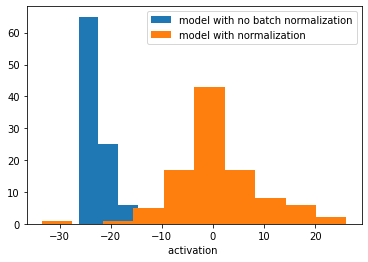

In [124]:
model.eval()
model_norm.eval()
out=model.activation(validation_dataset[0][0].reshape(-1,28*28))
plt.hist(out[2],label='model with no batch normalization' )
out_norm=model_norm.activation(validation_dataset[0][0].reshape(-1,28*28))
plt.hist(out_norm[2],label='model with normalization')
plt.xlabel("activation ")
plt.legend()
plt.show()

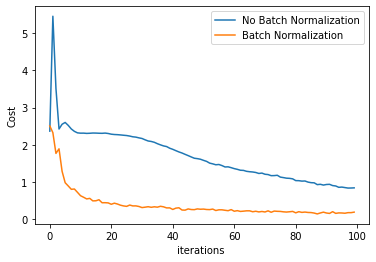

In [125]:
# Plot the diagram to show the loss

plt.plot(training_results['training_loss'], label='No Batch Normalization')
plt.plot(training_results_Norm['training_loss'], label='Batch Normalization')
plt.ylabel('Cost')
plt.xlabel('iterations ')   
plt.legend()
plt.show()

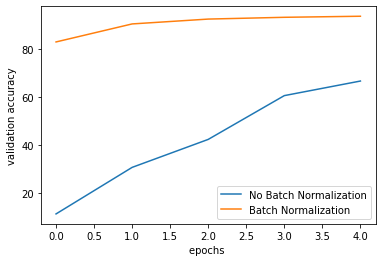

In [126]:
# Plot the diagram to show the accuracy

plt.plot(training_results['validation_accuracy'],label='No Batch Normalization')
plt.plot(training_results_Norm['validation_accuracy'],label='Batch Normalization')
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')   
plt.legend()
plt.show()

<!--Empty Space for separating topics-->
